<a href="https://colab.research.google.com/github/leandrorodor/ALR-Machine_Learning_AS/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

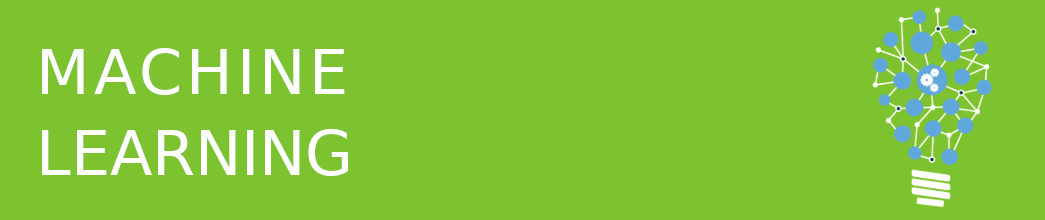

In [1]:
from IPython.display import Image
Image('/content/sample_data/banner_machine_learning.png')

## DecisionTreeRegressor

A árvore estabelece regras de decisão com base na importância das diferentes variáveis independentes, além de identificar quais variáveis deve-se dar maior importância.

Árvores de decisão tem o poder de, implicitamente, fazer uma seleção de quais atributos são mais importantes para o modelo, o que auxilia em uma apresentação não técnica. São fáceis de interpretar e relações não lineares não costumam atrapalhar o desempenho da árvore.



In [ ]:
import pandas as pd
import numpy as np 
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Download Dataset: [movies_multilinear_reg.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

In [ ]:
filmes = pd.read_csv('/content/sample_data/movies_multilinear_reg.csv')

In [ ]:
filmes.head(5)

,movieId,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Bilheteria
0,1,Toy Story (1995),0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216,5623234.602
1,2,Jumanji (1995),0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678,5714951.757
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597,9524339.124
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242,6331568.779
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246,6409617.277


In [ ]:
filmes.shape

(9125, 18)

In [ ]:
filmes_caract = filmes[filmes.columns[2:17]]
filmes_labels = filmes[filmes.columns[17:]]

In [ ]:
filmes_caract.head(5)

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
0,0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216
1,0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678
2,0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597
3,0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242
4,0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246


In [ ]:
filmes_labels.head(5)

,Bilheteria
0,5623234.602
1,5714951.757
2,9524339.124
3,6331568.779
4,6409617.277


In [ ]:
treino, teste, treino_labels, teste_labels = train_test_split(filmes_caract, filmes_labels)

In [ ]:
print('Shape do treino {}, Shape do teste {}'.format(treino.shape, teste.shape))

Shape do treino (6843, 15), Shape do teste (2282, 15)


In [ ]:
porc_treino = len(treino)/len(filmes_caract)*100
porc_teste =  len(teste)/len(filmes_caract)*100
print('Proporção Treino / Teste: {0:.2f}% / {1:.2f}%'.format(porc_treino, porc_teste))

Proporção Treino / Teste: 74.99% / 25.01%


In [ ]:
treino_arr = np.array(treino).reshape(len(treino),15)
teste_arr = np.array(teste).reshape(len(teste),15)

In [ ]:
print('Tipo e shape do array treino {} - {}'.format(type(treino_arr), treino_arr.shape))

Tipo e shape do array treino <class 'numpy.ndarray'> - (6843, 15)


In [ ]:
print('Tipo e shape do array teste {} - {}'.format(type(teste_arr), teste_arr.shape))

Tipo e shape do array teste <class 'numpy.ndarray'> - (2282, 15)


In [ ]:
treino_labels_arr = np.array(treino_labels).reshape(len(treino_labels),1)
teste_labels_arr = np.array(teste_labels).reshape(len(teste_labels),1)

#### Usando modelo DecisionTreeRegressor

In [ ]:
modelo = tree.DecisionTreeRegressor()
modelo.fit(treino_arr, treino_labels_arr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
score_treino = modelo.score(treino_arr, treino_labels_arr)
score_teste = modelo.score(teste_arr, teste_labels_arr)
print('DecisionTreeRegressor: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

DecisionTreeRegressor: Acertamos 100.00% no treino, Acertamos 64.34% no teste


#### Usando modelo LinearRegression

In [ ]:
modelo_reg = LinearRegression()
modelo_reg.fit(treino_arr, treino_labels_arr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
score_treino = modelo_reg.score(treino_arr, treino_labels_arr)
score_teste = modelo_reg.score(teste_arr, teste_labels_arr)
print('LinearRegression: Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_treino * 100, score_teste * 100))

LinearRegression: Acertamos 82.81% no treino, Acertamos 82.58% no teste


## Classificadores e métricas

In [ ]:
modelo_depth5 = tree.DecisionTreeRegressor(max_depth=5)
modelo_depth5.fit(treino_arr, treino_labels_arr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
score_max5_treino = modelo_depth5.score(treino_arr, treino_labels_arr)
score_max5_teste = modelo_depth5.score(teste_arr, teste_labels_arr)
print('DecisionTreeRegressor(max_depth=5): Acertamos {0:.2f}% no treino, Acertamos {1:.2f}% no teste'.
      format(score_max5_treino * 100, score_max5_treino * 100))

DecisionTreeRegressor(max_depth=5): Acertamos 80.88% no treino, Acertamos 80.88% no teste


In [ ]:
zootopia = [0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356]
modelo_depth5.predict([zootopia]) # modelo_depth5.predict(zootopia)

array([7835911.29005587])

In [ ]:
modelo.predict([zootopia])

array([6725487.125])

### Gostos do usuário

Download Dataset: [avaliacoes_usuario.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/avaliacoes_usuario.csv)

In [ ]:
gostos = pd.read_csv('/content/sample_data/avaliacoes_usuario.csv', encoding= 'unicode_escape') # Utilizar método "enconding" quando houver algum caractere não ASCII no dicionário que não pode ser codificado / decodificado.
gostos.head(5)

,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Gostou
0,Nixon (1995),0,0,0,0,0,0,0,0,0,0,0,1,0,114.496547,7.930748,1
1,Leaving Las Vegas (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,110.140191,18.276555,1
2,Persuasion (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,105.747597,16.582232,1
3,Babe (1995),0,0,0,0,0,0,0,0,0,0,1,1,0,126.131978,13.004553,1
4,Carrington (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,85.025469,14.418120,1


In [ ]:
caract = gostos[gostos.columns[1:16]]
labels = gostos[gostos.columns[16:]]

In [ ]:
treino, teste, treino_labels, teste_labels = train_test_split(caract, labels)

In [ ]:
treino = np.array(treino).reshape(len(treino), 15)
teste = np.array(teste).reshape(len(teste), 15)
treino_labels = treino_labels.values.ravel()
teste_labels = teste_labels.values.ravel()

In [ ]:
print('Tipos: treino {}, teste {}, treino_labels {}, teste_labels {}'.
      format(type(treino), type(teste), type(treino_labels), type(teste_labels)))

Tipos: treino <class 'numpy.ndarray'>, teste <class 'numpy.ndarray'>, treino_labels <class 'numpy.ndarray'>, teste_labels <class 'numpy.ndarray'>


In [ ]:
treino

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
677,0,0,0,0,0,0,0,0,1,0,0,1,0,87.231979,25.224405
309,1,0,0,0,0,0,0,0,0,0,0,0,0,134.068664,17.775033
297,0,0,0,0,0,0,0,0,1,0,0,1,0,105.705714,19.123293
390,0,0,0,0,0,0,0,1,0,0,0,0,1,85.998203,31.800642
656,1,0,0,0,0,0,0,0,0,0,0,0,0,116.190361,17.365236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0,0,0,0,0,0,0,0,0,0,0,1,0,113.143213,42.766356
404,0,0,0,0,0,0,1,0,0,0,0,1,0,102.653807,44.111427
206,0,0,0,0,1,0,0,0,1,0,0,1,0,98.678857,35.900864
635,0,0,0,0,0,0,0,0,1,0,0,0,0,86.380513,28.085327


#### Usando LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(treino, treino_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
previsoes = model.predict(teste)
acuracia = accuracy_score(teste_labels, previsoes)
print('Acuracia com LogisticRegression no teste: {0:.2f}%'.format(acuracia * 100))

Acuracia com LogisticRegression no teste: 84.12%


#### Usando DecissionTreeClassifier

In [ ]:
modelo = tree.DecisionTreeClassifier()
modelo.fit(treino, treino_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
previsoes = modelo.predict(teste)
acuracia = accuracy_score(teste_labels, previsoes)
print('Acuracia com DecisionTreeClassifier no teste: {0:.2f}%'.format(acuracia * 100))
previsoes = modelo.predict(treino)
acuracia = accuracy_score(treino_labels, previsoes)
print('Acuracia com DecisionTreeClassifier com treino: {0:.2f}%'.format(acuracia * 100))

Acuracia com DecisionTreeClassifier no teste: 67.06%
Acuracia com DecisionTreeClassifier com treino: 100.00%


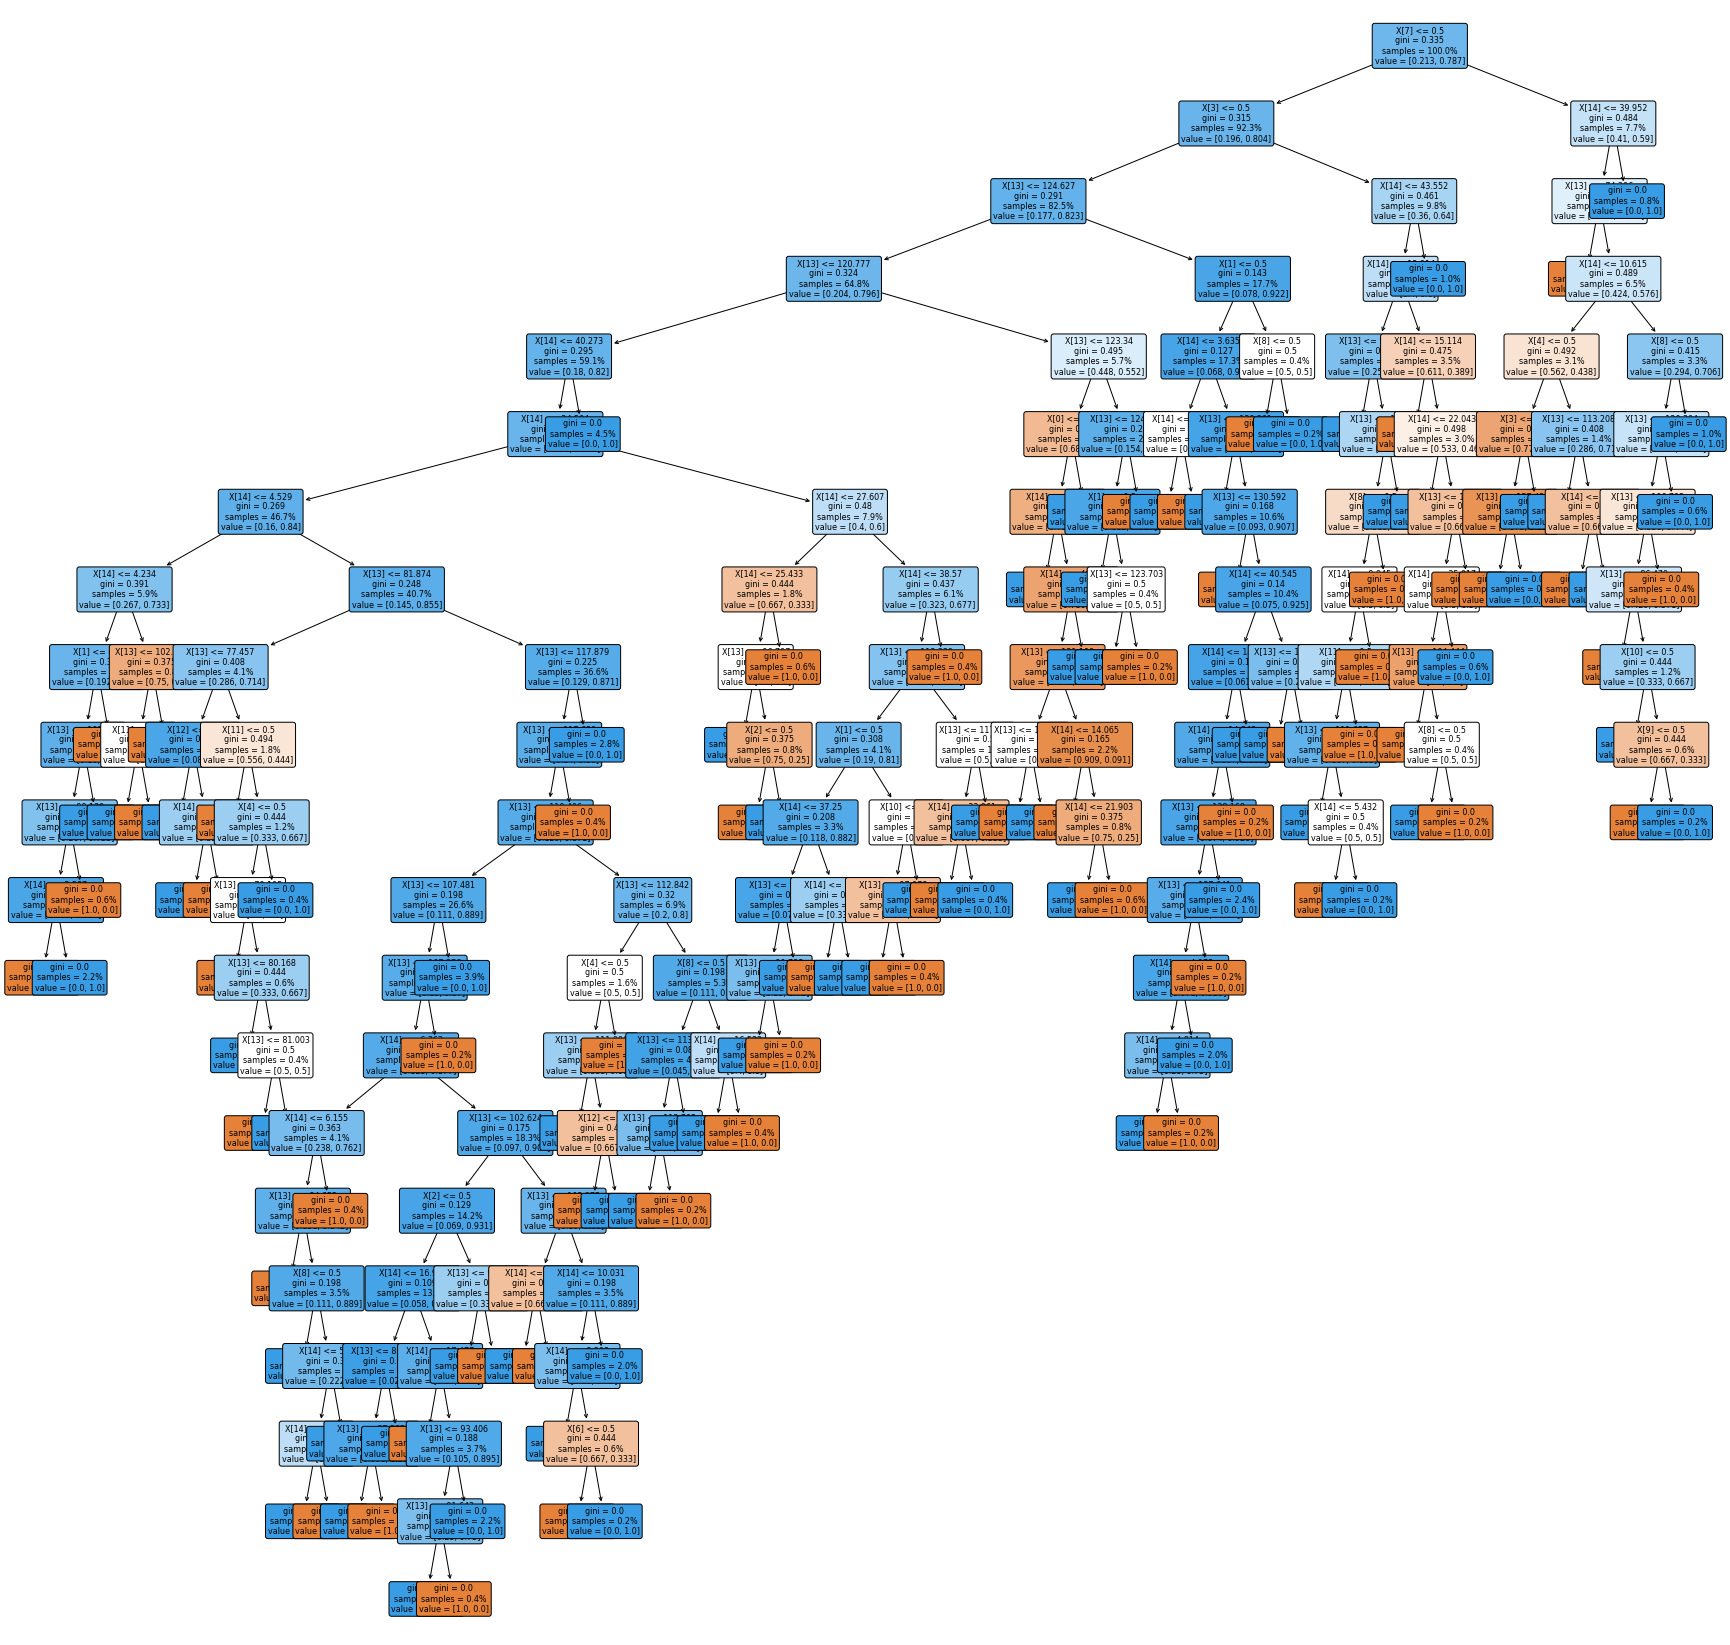

In [ ]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(modelo, filled=True, fontsize=8, proportion=True, rounded=True)

#### Usando DecisionTreeClassifier(max_depth=5)

In [ ]:
modelo_max5 = tree.DecisionTreeClassifier(max_depth=5)
modelo_max5.fit(treino, treino_labels)
previsoes = modelo_max5.predict(teste)
acuracia = accuracy_score(teste_labels, previsoes)
print('Acuracia com DecisionTreeClassifier(max_depth=5) no teste: {0:.2f}%'.format(acuracia * 100))
previsoes = modelo_max5.predict(treino)
acuracia = accuracy_score(treino_labels, previsoes)
print('Acuracia com DecisionTreeClassifier(max_depth=5) com treino: {0:.2f}%'.format(acuracia * 100))

Acuracia com DecisionTreeClassifier(max_depth=5) no teste: 78.82%
Acuracia com DecisionTreeClassifier(max_depth=5) com treino: 82.28%


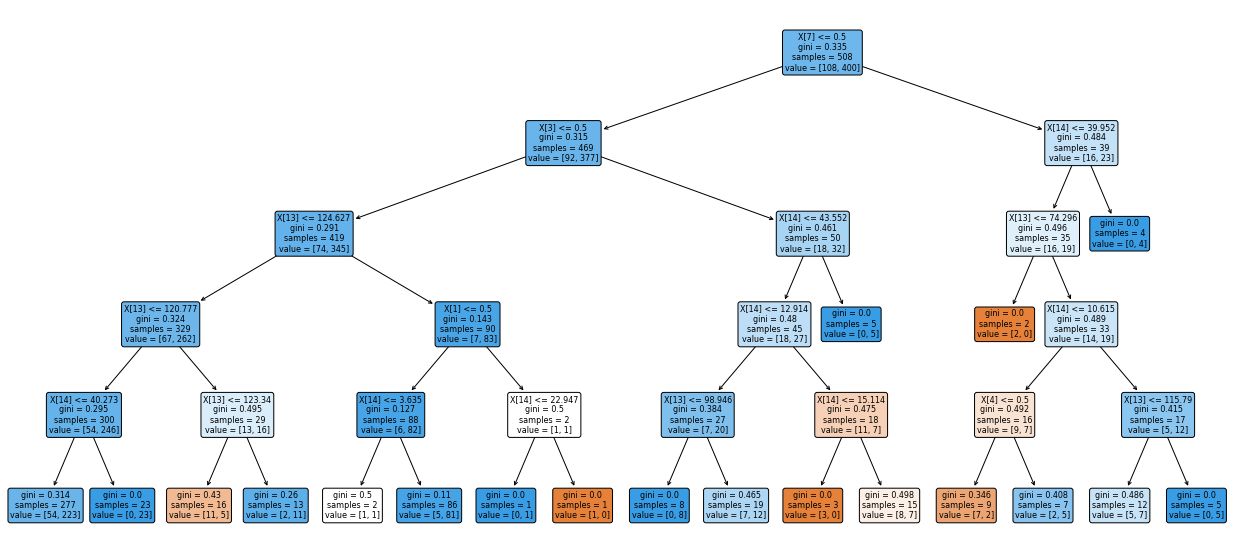

In [ ]:
fig = plt.figure(figsize=(22,10))
_ = tree.plot_tree(modelo_max5, filled=True, fontsize=8, proportion=False, rounded=True)

In [ ]:
fig.savefig("/content/sample_data/decistion_tree.png")

In [ ]:
text_representation = tree.export_text(modelo_max5)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_13 <= 124.63
|   |   |   |--- feature_13 <= 120.78
|   |   |   |   |--- feature_14 <= 40.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  40.27
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  120.78
|   |   |   |   |--- feature_13 <= 123.34
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_13 >  123.34
|   |   |   |   |   |--- class: 1
|   |   |--- feature_13 >  124.63
|   |   |   |--- feature_14 <= 3.64
|   |   |   |   |--- feature_13 <= 135.13
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  135.13
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_14 >  3.64
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- feature_14 <= 43.55
|   |   |   |--- feature_14 <= 12.91
|   |   |   |   |--- feature_13 <= 98